#### Threat analysis possed by top 50 delegates of Gitcoin

In [18]:
# Cell 1: environment

import matplotlib.font_manager as fm
import numpy as np
import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import os 
import math as mt
from bs4 import BeautifulSoup
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import pandas as pd
import requests
import scipy.fftpack
from pprint import pprint
from operator import itemgetter
%matplotlib inline

cwd = os.getcwd()
pwd = os.path.abspath(os.path.join(cwd, os.pardir))
fontloc = pwd + '/../SF-Pro/SF-Pro-Regular.ttf'
font = fm.FontProperties(fname = fontloc,size = 8); prop = font
proplr = fm.FontProperties(fname = fontloc,size = 12)
prop10 = fm.FontProperties(fname = fontloc,size = 10)

fontlocit = pwd + '/../SF-Mono/SF-Mono-Regular.otf'
fontit = fm.FontProperties(fname = fontlocit,size = 8)

#ticks font
def ticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
        
def ticks3(ax, x, y, z):
    font = fm.FontProperties(fname = fontloc,size = x)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    font = fm.FontProperties(fname = fontloc,size = y)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
    font = fm.FontProperties(fname = fontloc,size = z)
    for label in ax.get_zticklabels():
        label.set_fontproperties(font)
        
def xticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        
def yticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str("{0:.1f}".format(x)) if x < 0 else str("{0:.2f}".format(x))
    return label

import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [8]:
# read in data
file_in = cwd + '/../Data/GTC.log'
f = open(file_in, 'r')
lines = f.readlines()
f.close()

index = []; rank = []; karma = []
percIn = []; perc = []
voteIn = []; vote = []
nameIn = []; name = []

for line in lines:
    if not line.startswith("#"):
        column = line.split()
        index.append(int(column[0]))
        nameIn.append(str(column[1]))
        percIn.append(float(column[2]))
        voteIn.append(int(column[3]))

lines = []
toSort = [-1 * i for i in voteIn]
outSort = np.argsort(toSort).tolist()
c = 1
print("#karma", "#rank", "#votes", "#name")
for i in outSort:
    if c <= 50:
        karma.append(i + 1)
        rank.append(c)
        vote.append(voteIn[i])
        perc.append(percIn[i])
        name.append(nameIn[i])
        print(i + 1, c, voteIn[i], nameIn[i])
        c = c + 1
    else:
        continue
    
voteCache = vote; percCache = perc


#karma #rank #votes #name
11 1 1784553 austingriffith.eth
12 2 1453791 lindajxie.eth
9 3 1101544 simona.eth
10 4 1052531 kris.eth
7 5 1050000 kbw.eth
5 6 983335 lefteris.eth
31 7 821118 trent.eth
23 8 606500 fishbiscuit.eth
8 9 329512 trueblocks.eth
24 10 327316 griff.eth
29 11 324500 null
2 12 263823 yalor.eth
38 13 174599 null
236 14 161859 p1anck.eth
20 15 155991 helloshreyas.eth
37 16 152166 tobyshorin.eth
16 17 152011 coinqt.eth
1 18 83740 disruptionjoe.eth
64 19 53594 null
214 20 27787 sujiyan.eth
102 21 24956 philh.p2p.eth
92 22 20173 null
44 23 18487 paul2.eth
247 24 17057 ntnsndr.eth
237 25 15171 null
21 26 12681 matoken.eth
28 27 12254 monetsupply.eth
113 28 10953 amyjung.eth
30 29 10609 andy.thebluebook.eth
15 30 10412 androolloyd.eth
4 31 9700 bobjiang.eth
36 32 6859 adamscochran.eth
34 33 6423 null
14 34 5260 phutchins.eth
152 35 4661 conectopia.eth
35 36 2570 aaronsoskin.eth
26 37 2009 adamstallard.eth
18 38 1954 null
151 39 1802 null
3 40 1664 sirlupinwatson.eth
32 41 11

#### Utopia

Consider the hypothetical utopic scenario first. In the trivial utopic scenario where the votes are equally distributed among the delegates following a flat power-spectrum, the analytical estimation of attack surface becomes trivial as well. 

In [9]:
import itertools

totalVotes = int(np.sum(vote)/(np.sum(perc)*0.01))
print('Total Castable Votes: ' + str(totalVotes))
threshold = 2500000
Total = len(rank)

#N-party attack in Utopia
vote = [totalVotes/Total for i in range(Total)]
perc = [100.0/Total for i in range(Total)]
print('Utopia: ' + str(int(totalVotes/Total)) + ' @ ' + str(100.0/Total) + '%')

N = 6; possVec = []
for perps in range(1, Total + 1):
    print('Possible Collusions with ' + str(perps) + ' colluder(s): ' + str(int(np.math.factorial(Total)/(np.math.factorial(Total - perps) * np.math.factorial(perps)))))
    possVec.append(int(np.math.factorial(Total)/(np.math.factorial(Total - perps) * np.math.factorial(perps))))

print('#Discrete Threat Analysis in Utopia')
print('#colluders', '#threats')
for perps in range(2,N + 1):
    perms = list(itertools.combinations(rank,perps))
    threat = []; attackers = []
    for val in perms:
      attack = 0; names = ''; ranks = []
      for i in val:
          attack = attack + vote[int(i - 1)]
          #names = names + name[int(i - 1)] + ';'
          ranks.append(rank[int(i - 1)])
      if attack > threshold:
           #attackers.append(names)
           threat.append(ranks)
      attack = 0
      
    print(perps, len(threat), len(perms))
    
perc = []; vote = []



Total Castable Votes: 99999999
Utopia: 1999999 @ 2.0%
Possible Collusions with 1 colluder(s): 50
Possible Collusions with 2 colluder(s): 1225
Possible Collusions with 3 colluder(s): 19600
Possible Collusions with 4 colluder(s): 230300
Possible Collusions with 5 colluder(s): 2118760
Possible Collusions with 6 colluder(s): 15890700
Possible Collusions with 7 colluder(s): 99884400
Possible Collusions with 8 colluder(s): 536878650
Possible Collusions with 9 colluder(s): 2505433700
Possible Collusions with 10 colluder(s): 10272278170
Possible Collusions with 11 colluder(s): 37353738800
Possible Collusions with 12 colluder(s): 121399651100
Possible Collusions with 13 colluder(s): 354860518600
Possible Collusions with 14 colluder(s): 937845656300
Possible Collusions with 15 colluder(s): 2250829575120
Possible Collusions with 16 colluder(s): 4923689695575
Possible Collusions with 17 colluder(s): 9847379391150
Possible Collusions with 18 colluder(s): 18053528883775
Possible Collusions with 19 c

#### Real World

File [GTC.log](https://github.com/inplco/dao-attacks/blob/master/GTC/Data/GTC.log) contains voting data of top 50 ENS delegates scrapped from [ShowKarma.xyz](https://showkarma.xyz). The file header contains four columns: <br>
<code>#</code> rank of the delegate, <br>
<code>#</code> name of delegate, <br>
<code>#</code> voting share in percentage of the delegate, and <br>
<code>#</code> number of votes of the delegate.

In [10]:
#N-party attack in reality
print('#Discrete Threat Analysis in Real World')
print('#colluders', '#threats')
perc = percCache; vote = voteCache
delegates = []; hostilities = []
for perps in [2,3,4,5,6,47,48,49,50]:
    perms = list(itertools.combinations(rank,perps))
    threats = []; attackers = []; analyses = []
    for val in perms:
      attack = 0; names = []; threat = []
      for i in val:
          attack = attack + vote[int(i - 1)]
          names.append(name[int(i - 1)])
          threat.append(rank[int(i - 1)])
      
      if attack > threshold:
           attackers.append(names)
           threats.append(threat)
      attack = 0
    dangers = [item for sublist in threats for item in sublist]
    for item in rank:
      count = dangers.count(item)
      analyses.append([item, count])
    print(perps, len(threats))
    analysed = sorted(analyses, key=itemgetter(1), reverse=True)
    if len(threats) > 0:
      delegate = range(1, Total + 1)
      hostility = [row[1]/len(threats) for row in analyses]
      delegates.append(delegate)
      hostilities.append(hostility)

#Discrete Threat Analysis in Real World
#colluders #threats
2 9
3 454
4 11216
5 179717
6 2087198
47 19600
48 1225
49 50
50 1


Index is  -0.3031860154717943


/var/folders/_w/t15_t4yj62lf0jzxr77nxwv00000gn/T/ipykernel_84288/2522767160.py:30: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  plt.savefig(cwd + "/../Images/PNG/Threats.png", format="png", dpi=300, facecolor='w', edgecolor='none')
/var/folders/_w/t15_t4yj62lf0jzxr77nxwv00000gn/T/ipykernel_84288/2522767160.py:30: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from current font.
  plt.savefig(cwd + "/../Images/PNG/Threats.png", format="png", dpi=300, facecolor='w', edgecolor='none')
/var/folders/_w/t15_t4yj62lf0jzxr77nxwv00000gn/T/ipykernel_84288/2522767160.py:30: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from current font.
  plt.savefig(cwd + "/../Images/PNG/Threats.png", format="png", dpi=300, facecolor='w', edgecolor='none')
/var/folders/_w/t15_t4yj62lf0jzxr77nxwv00000gn/T/ipykernel_84288/2522767160.py:31: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  plt.savefig(cwd + "/../Images/SVG/Threat

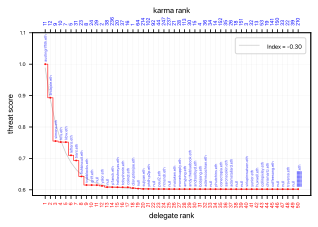

In [30]:
%config InlineBackend.figure_format = 'svg'
import powerlaw 
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

hostile = [sum(x) for x in zip(hostilities[0],hostilities[1],hostilities[2],hostilities[3],hostilities[4],hostilities[5],hostilities[6],hostilities[7],hostilities[8])] 
maxVal = max(hostile)
hostile = [i/maxVal for i in hostile]
popt, pcov = curve_fit(func, rank, hostile);
a, b, c = popt
fitted = [func(i, a, b, c) for i in rank]
print("Index is ", str(-b))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,3),dpi=300)
plt.subplot(1, 1, 1)  
plt.plot(rank, fitted, color='k',linewidth=0.75,alpha=0.2)
plt.plot(rank, hostile, alpha = 0.8, color='r',linewidth=0.75,drawstyle='steps-mid',marker='.',markersize=2.0)
plt.ylabel("threat score",fontproperties=font,fontsize=8)
plt.xlabel("delegate rank",fontproperties=font,fontsize=8)
ax = gca(); ticks(ax,5); ax.set_xticks(rank); ax.set_xticklabels(rank,rotation=90,color='r');
plt.grid(alpha=0.75,linestyle='-',linewidth=0.1); ax.autoscale(tight=False)
ax.set_ylim(None, max(hostile) + 0.1)
[ax.annotate(str(k), (x - 0.25, y + 0.01),rotation=90,color='b',alpha=0.7,fontproperties=font,fontsize=4) for x, y, k in zip(rank, hostile, name)];
ax2 = ax.twiny(); ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(rank); ax2.set_xticklabels(karma,rotation=90,color='b'); ticks(ax2,5); 
ax2.set_xlabel("karma rank",fontproperties=font,fontsize=8);
#l1 = ax.legend(['number of colluders = 4','number of colluders = 5','number of colluders = 6','number of agreers = 47','number of agreers = 48','number of agreers = 49'],loc='upper right',ncol=1)
l1 = ax.legend(['Index = -0.30'],loc='upper right',ncol=1)
plt.setp(l1.texts,fontproperties=font,fontsize=6)
plt.savefig(cwd + "/../Images/PNG/Threats.png", format="png", dpi=300, facecolor='w', edgecolor='none')
plt.savefig(cwd + "/../Images/SVG/Threats.svg", format="svg", facecolor='w', edgecolor='none')
#delegates = []; hostilities = []; threats = []; attackers = []; analyses = []; 